# Practical Statistics for Data Scientists
## Chapter 1


Data: https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo 

In [1]:
import pandas as pd

In [2]:
medal_count = pd.read_excel("Data\\Medals.xlsx")
medal_count

C:\Users\shash\miniconda3\envs\minimal_ds\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location

In [3]:
# Mean
medal_count["Total"].mean()

11.612903225806452

In [6]:
# Weighted Mean

import numpy as np

np.average(medal_count["Total"], weights=medal_count["Gold"])

46.832352941176474

In [12]:
# Trimmed Mean

from scipy.stats import trim_mean

trim_mean(medal_count["Total"], 0.1)

6.8933333333333335

In [11]:
# Median

medal_count["Total"].median()

4.0

In [13]:
# Weighted Median

# Sourced from: https://newbedev.com/python-weighted-median-algorithm-with-pandas

def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, "Total", "Gold")

40

In [15]:
q3 = np.percentile(medal_count["Total"], 75)
q3

11.0

In [16]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability (Dispersion Metrics)

In [17]:
# Variance

from statistics import variance

variance(medal_count["Gold"])

49.315100514259

In [18]:
# Standard Deviation

from statistics import stdev

stdev(medal_count["Gold"])

7.022471111671376

In [19]:
# Mean absolute deviation

from numpy import mean, absolute

mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))

4.0048560527228565

In [21]:
# Median Absolute Deviation

from numpy import median, absolute

median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

1.0

In [22]:
# Interquartile Range

q3, q1 = np.percentile(medal_count["Gold"], [75 ,25])
iqr = q3 - q1
iqr

3.0

## Exploring the Data Distribution

<AxesSubplot:>

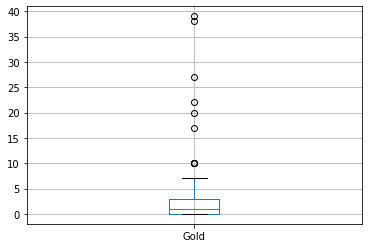

In [28]:
# Box Plots

medal_count.boxplot(column="Gold", by=None, ax=None)

In [35]:
# Frequency Table

frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [36]:
# Histogram

np.histogram(medal_count["Gold"], bins=10)

(array([72, 11,  4,  0,  1,  2,  1,  0,  0,  2], dtype=int64),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]))

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

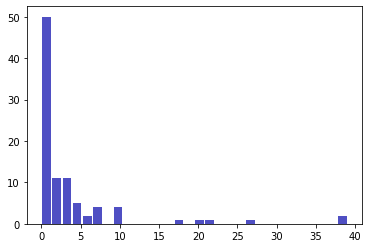

In [39]:
import matplotlib.pyplot as plt

plt.hist(x=medal_count["Gold"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

<AxesSubplot:ylabel='Density'>

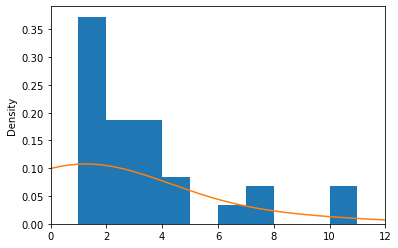

In [41]:
# Density Plot


ax = medal_count["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)

## Exploring Binary and Categorical Data

In [42]:
# Mode

medal_count["Gold"].mode()

0    0
dtype: int64

Text(0, 0.5, 'Country')

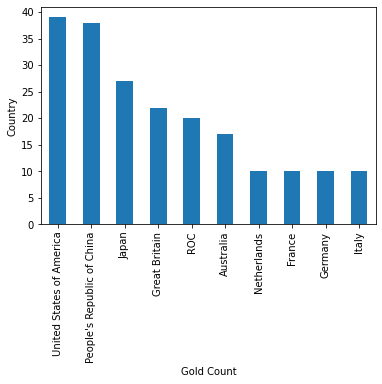

In [45]:
# Bar Chart

ax = medal_count.iloc[:10, :].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

([<matplotlib.patches.Wedge at 0x21f51e6e040>,
 [Text(-0.7155314051070093, 0.8354728052459811, 'United States of America'),
  Text(-0.9458998161617527, -0.5614922419634689, "People's Republic of China"),
  Text(0.15924203448189886, -1.0884125938512774, 'Japan'),
  Text(0.9458998161617524, -0.5614922419634694, 'Great Britain'),
  Text(1.0717821060885606, 0.247554270955622, 'ROC'),
  Text(0.6847227019531091, 0.8609034913566292, 'Australia'),
  Text(0.19865842661840455, 1.081912579432137, 'Netherlands')],
 [Text(-0.39028985733109595, 0.45571243922508053, '22.5%'),
  Text(-0.5159453542700468, -0.3062684956164376, '22.0%'),
  Text(0.0868592915355812, -0.5936795966461513, '15.6%'),
  Text(0.5159453542700467, -0.30626849561643776, '12.7%'),
  Text(0.5846084215028512, 0.13502960233943015, '11.6%'),
  Text(0.3734851101562413, 0.46958372255816133, '9.8%'),
  Text(0.10835914179185702, 0.590134134235711, '5.8%')])

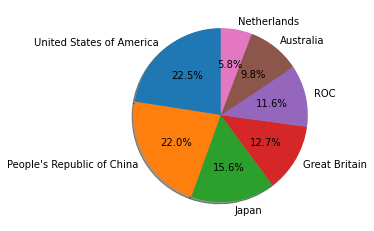

In [51]:
# Pie Chart

pie_data = medal_count.iloc[:7, :]

plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"], autopct='%1.1f%%',
        shadow=True, startangle=90)

## Correlation

In [53]:
# Correlation Matrix

medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

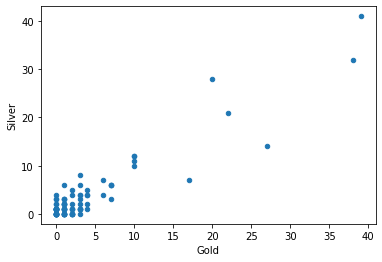

In [54]:
medal_count.plot.scatter(x="Gold", y="Silver")

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

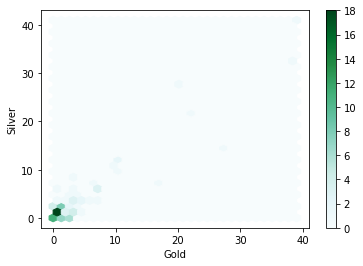

In [56]:
medal_count.plot.hexbin(x="Gold", y="Silver", gridsize=30, sharex=False)

C:\Users\shash\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

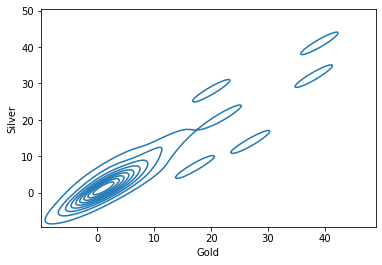

In [60]:
import seaborn as sns

ax = sns.kdeplot(medal_count["Gold"], medal_count["Silver"])
ax

<AxesSubplot:>

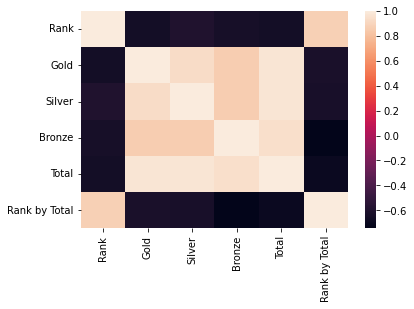

In [61]:
# Heatmap

sns.heatmap(medal_count.corr())

In [67]:
# Contingency Table

crosstab = medal_count[["Silver", "Gold"]].pivot_table(index='Silver', columns='Gold',
 aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0, inplace=0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:xlabel='Gold'>

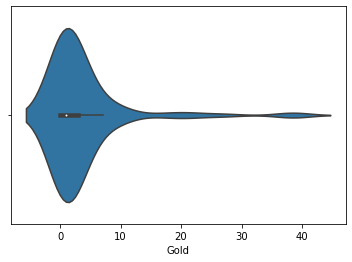

In [68]:
# Violin Plot

sns.violinplot(x=medal_count["Gold"])

<AxesSubplot:>

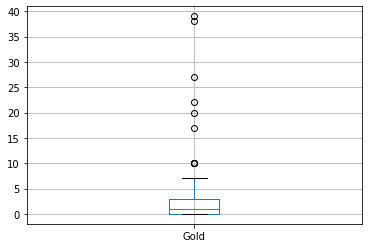

In [71]:
medal_count.boxplot(column="Gold")